# Create Plots and HTML file for Stellar Parameter Overview

## Author(s): Sven Buder (SB, WG4)

This idea for this notebook is based on the documentation of SDSS-IV APOGEE DR16 ([arXiv:1912.02905](https://ui.adsabs.harvard.edu/abs/2019arXiv191202905A)):  
https://data.sdss.org/sas/dr16/apogee/spectro/aspcap/r12/l33/html/allfit.html  
We thank the people of SDSS-IV APOGEE DR16 for their documentation!

### History:
200305 SB Created

In [1]:
# Preamble for notebook 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import glob
import scipy
import pandas
from astropy.table import Table, hstack, vstack

# Matplotlib and associated packages for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.transforms import Bbox,TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
from matplotlib._png import read_png
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

params = {
    'font.family'        : 'sans',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]
parula_0 = ListedColormap(_parula_data, name='parula_0')
parula_0.set_bad((1,1,1))
parula_r = ListedColormap(_parula_data[::-1], name='parula_r')

willi_blau = [0.0722666667, 0.4886666667, 0.8467]

In [2]:
def plot_density(x, y, bins=100, range=None, normed=False, weights=None, 
                 scaling=None, reduce_fn='median', smooth=0, ax=None, cmin=5, **kwargs):
    """
    Compute the bi-dimensional histogram of two data samples.

    Parameters
    ----------
    x : array_like, shape (N,)
        An array containing the x coordinates of the points to be
        histogrammed.
    y : array_like, shape (N,)
        An array containing the y coordinates of the points to be
        histogrammed.
    bins : int or array_like or [int, int] or [array, array], optional
        The bin specification:

        * If int, the number of bins for the two dimensions (nx=ny=bins).
        * If array_like, the bin edges for the two dimensions
            (x_edges=y_edges=bins).
        * If [int, int], the number of bins in each dimension
            (nx, ny = bins).
        * If [array, array], the bin edges in each dimension
            (x_edges, y_edges = bins).
        * A combination [int, array] or [array, int], where int
            is the number of bins and array is the bin edges.

    range : array_like, shape(2,2), optional
        The leftmost and rightmost edges of the bins along each dimension
        (if not specified explicitly in the `bins` parameters):
        ``[[xmin, xmax], [ymin, ymax]]``. All values outside of this range
        will be considered outliers and not tallied in the histogram.
    normed : bool, optional
        If False, returns the number of samples in each bin. If True,
        returns the bin density ``bin_count / sample_count / bin_area``.
    weights : array_like, shape(N,), optional
        An array of values ``w_i`` weighing each sample ``(x_i, y_i)``.
        Weights are normalized to 1 if `normed` is True. If `normed` is
        False, the values of the returned histogram are equal to the sum of
        the weights belonging to the samples falling into each bin.
    """
    import pylab as plt
    from scipy.ndimage import gaussian_filter

    ind = (np.isfinite(x) & np.isfinite(y))
    if False in ind:
        print("Warning: Not all values are finite.")
        w = weights
        if w is not None:
            w = w[ind]
        n, bx, by = plt.histogram2d(x[ind], y[ind], bins=bins, range=range, normed=normed,
                                    weights=w)
    else:
        n, bx, by = plt.histogram2d(x, y, bins=bins, range=range, normed=normed,
                                    weights=weights)

    if reduce_fn.lower() in ('average', 'mean', 'avg'):
        n0, _, _ = plt.histogram2d(x, y, bins=bins, range=range, normed=normed,
                                   weights=None)
        
        cmin_limit = (n0 < cmin)
        n[cmin_limit] = np.nan
        ind = n0 > 0
        n = n.astype(float)
        n[ind] /= n0[ind].astype(float)
    n[(n==0)] = np.nan
    
    defaults = dict(zorder = 2, cmap='RdYlBu_r', origin='lower', aspect='auto', rasterized=True,
                    interpolation='nearest')
    defaults.update(**kwargs)
    extent = (bx[0], bx[-1], by[0], by[-1])

    if smooth > 0:
        gaussian_filter(n, smooth, output=n)

    if ax==None:
        ax = plt.gca()
    else:
        ax=ax
        
    if scaling is None:
        scaling = 'None'
    s = scaling.lower().replace(' ', '')
    if s in (None, 'none', 'count'):
        return ax.imshow(n.T, extent=extent, **defaults)#, n
    else:
        if s in ('log', 'log(n)', 'log10', 'log(count)'):
            return ax.imshow(np.log10(n).T, extent=extent, **defaults)#, np.log10(n)
        elif s in ('log(n+1)', 'log(count+1)'):
            return ax.imshow(np.log10(n + 1).T, extent=extent, **defaults)#, np.log10(n + 1)

In [3]:
main_catalog_file = '../../../catalogs/GALAH_DR3_main_allspec_v1.fits'
main_catalog = Table.read(main_catalog_file)

In [4]:
def plot_cmd_kiel(data, flag, 
                  fe_h_use = 'fe_h', isochrones = False, cmin = 3, vmax = 3*10**3, 
                  teff = (3250, 8250, 50), logg = (-0.5, 5.5, 0.05),
                  color = (0,3,0.05), mag = (-4,11,0.1)
                 ):
    
    if flag == 0:
        data = data[((data['flag_sp'] <= flag) & ((data['teff'] > 4000) | (data['fe_h'] > -1.0)))]
        comp=r'$=$'
    elif flag == 10000:
        data = data[((data['flag_sp'] > 0) & np.isfinite(data['fe_h']))]
        flag = 0
        comp = r'$>$'
    else:
        data = data[((data['flag_sp'] < flag) & np.isfinite(data['fe_h']))]
        comp=r'$<$'
    
    f, (ax0, ax1) = plt.subplots(1, 2, figsize = (10,5))
    
    marcs_kwargs = dict(
        c = 'r',
        lw = 1
    )
    
    hist_scatter = dict(
        s = 1,
        c = 'k',
        zorder = 1,
        rasterized = True
    )
    
    ax0.scatter(
        data['bp_rp'],
        data['phot_g_mean_mag'] + 5*np.log10(10./data['r_est']),
        **hist_scatter
    )
    
    hist_kwargs_density = dict(
        cmap = parula,
        cmin = cmin,
        bins = (
            np.arange(color[0],color[1] + color[2], color[2]),
            np.arange(mag[0],mag[1] + mag[2], mag[2])
        ),
        vmin=cmin, vmax=3000,
        rasterized = True,
        norm=LogNorm()
    )
    
    p0, x0, y0, s0 = ax0.hist2d(
        data['bp_rp'],
        data['phot_g_mean_mag'] + 5*np.log10(10./data['r_est']),
        zorder=2,
        **hist_kwargs_density
    )
    
    ax0.set_xlim(color[0],color[1])
    ax0.set_xlabel(r'$G_\text{BP} - G_\text{RP}$',fontsize=30)
    ax0.set_ylim(mag[1],mag[0])
    ax0.set_ylabel(r'$M_G$',fontsize=30)
    c0 = plt.colorbar(s0, ax=ax0)
    c0.set_label('Nr. Stars')
    
    
    #ax1.plot(marcs_gridedge[:,0],marcs_gridedge[:,1],**marcs_kwargs)
    #ax1.text(0.1,0.05,'MARCS grid',transform=ax1.transAxes, color='r', fontsize=15)

    #ax1.text(0.025,0.95,r'Spectroscopy:',transform=ax1.transAxes, color='k', fontsize=15, ha='left')
    ax1.text(0.025,0.925,r'GALAH DR3',transform=ax1.transAxes, color='k', fontsize=25,ha='left')
    
    hist_scatter = dict(
        s = 1,
        c = 'k',
        zorder = 1,
        rasterized = True
    )
    
    ax1.scatter(
        data['teff'],
        data['logg'],
        **hist_scatter
    )
    
    hist_kwargs_density = dict(
        cmap = parula,
        cmin = cmin,
        bins = (
            np.arange(teff[0],teff[1] + teff[2], teff[2]),
            np.arange(logg[0],logg[1] + logg[2], logg[2])
        ),
        vmin=cmin, vmax=vmax,
        rasterized = True,
        norm=LogNorm()
    )
    
    p1, x1, y1, s1 = ax1.hist2d(
        data['teff'],
        data['logg'],
        zorder=2,
        **hist_kwargs_density
    )
    
    ax1.set_xlim(teff[1],teff[0])
    ax1.set_xlabel(r'$T_\text{eff}$',fontsize=30)
    ax1.set_ylim(logg[1],logg[0])
    ax1.set_ylabel(r'$\log g$',fontsize=30)
    c1 = plt.colorbar(s1, ax=ax1)
    c1.set_label('Nr. Stars')

    ax0.text(0.025,0.025,r'\textit{Gaia} DR2',transform=ax0.transAxes, color='k', fontsize=25,ha='left')
    
    
    plt.tight_layout()
    return f

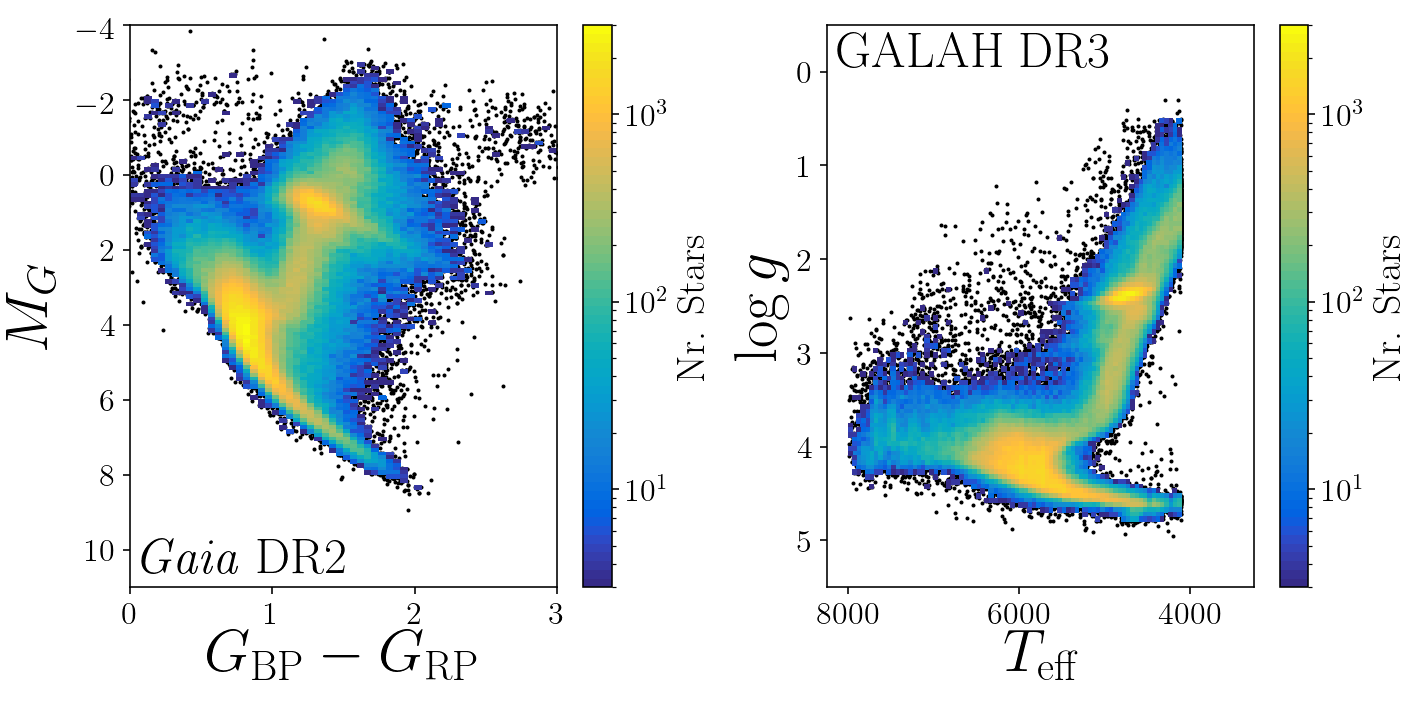

In [5]:
plot_cmd_kiel = plot_cmd_kiel(main_catalog, flag=0)
plot_cmd_kiel.savefig('../../../dr3_release_paper/figures/CMD_Kiel_Diagram_GALAH_flag_0.png', dpi=200, bbox_inches = 'tight')

In [6]:
# Get MARCS grid edges 

# import scipy
# from scipy import io
# marcs = scipy.io.readsav('../../trunk/sme_536/atmospheres/marcs2014.sav')

# marcs_gridedge = []
# for each_teff in np.unique(marcs.atmo_grid['TEFF']):
#     sub = (marcs.atmo_grid['TEFF'] == each_teff)
#     marcs_gridedge.append([each_teff, np.min(marcs.atmo_grid['LOGG'][sub])])
# for each_teff in np.unique(marcs.atmo_grid['TEFF']):
#     sub = (marcs.atmo_grid['TEFF'] == each_teff)
#     marcs_gridedge.append([each_teff, np.max(marcs.atmo_grid['LOGG'][sub])])
    
# marcs_gridedge = np.array(marcs_gridedge)

marcs_gridedge = np.array([[  2.50000000e+03,  -5.00000000e-01],
       [  2.60000000e+03,  -5.00000000e-01],
       [  2.70000000e+03,  -5.00000000e-01],
       [  2.80000000e+03,  -5.00000000e-01],
       [  2.80000000e+03,   0.00000000e+00],
       [  2.90000000e+03,   0.00000000e+00],                           
       [  3.00000000e+03,   0.00000000e+00],                           
       [  3.00000000e+03,   5.00000000e-01],                           
       [  3.10000000e+03,   5.00000000e-01],                           
       [  3.20000000e+03,   5.00000000e-01],
       [  3.20000000e+03,   0.00000000e+00],
       [  3.30000000e+03,   0.00000000e+00],
       [  3.30000000e+03,  -5.00000000e-01],
       [  3.40000000e+03,  -5.00000000e-01],
       [  3.50000000e+03,  -5.00000000e-01],
       [  3.60000000e+03,  -5.00000000e-01],
       [  3.70000000e+03,  -5.00000000e-01],
       [  3.80000000e+03,  -5.00000000e-01],
       [  3.90000000e+03,  -5.00000000e-01],
       [  4.00000000e+03,  -5.00000000e-01],
       [  4.25000000e+03,  -5.00000000e-01],
       [  4.25000000e+03,   0.00000000e+00],
       [  4.50000000e+03,   0.00000000e+00],
       [  4.75000000e+03,   0.00000000e+00],
       [  5.00000000e+03,   0.00000000e+00],
       [  5.25000000e+03,   0.00000000e+00],
       [  5.25000000e+03,   5.00000000e-01],
       [  5.50000000e+03,   5.00000000e-01],
       [  5.75000000e+03,   5.00000000e-01],
       [  6.00000000e+03,   5.00000000e-01],
       [  6.00000000e+03,   1.00000000e+00],
       [  6.25000000e+03,   1.00000000e+00],
       [  6.50000000e+03,   1.00000000e+00],
       [  6.75000000e+03,   1.00000000e+00],
       [  6.75000000e+03,   1.50000000e+00],
       [  7.00000000e+03,   1.50000000e+00],
       [  7.25000000e+03,   1.50000000e+00],
       [  7.50000000e+03,   1.50000000e+00],
       [  7.50000000e+03,   2.00000000e+00],
       [  7.75000000e+03,   2.00000000e+00],
       [  8.00000000e+03,   2.00000000e+00],
       [  8.00000000e+03,   5.00000000e+00],
       [  3.90000000e+03,   5.00000000e+00],
       [  3.90000000e+03,   5.50000000e+00],
       [  2.50000000e+03,   5.50000000e+00]])

In [23]:
def plot_kiel(data, flag, fe_h_use = 'fe_h', isochrones = False, cmin = 3, vmax = 3*10**3, teff = (2750, 8250, 50), logg = (-0.51, 5.51, 0.05), feh = (-2, 0.5), a1='a)', a2='b)'):
    
    all_data = data
    
    if flag == 0:
        data = data[((data['flag_sp'] <= flag))]
        comp=r'$=$'
    elif flag == 10000:
        data = data[((data['flag_sp'] > 0) & np.isfinite(data['fe_h']))]
        flag = 0
        comp = r'$>$'
    else:
        data = data[((data['flag_sp'] < flag) & np.isfinite(data['fe_h']))]
        comp=r'$<$'
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,7))
    
    props = dict(boxstyle='round', facecolor='w', alpha=0.75)
    ax1.text(0.025, 0.975, a1, transform=ax1.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    ax2.text(0.025, 0.975, a2, transform=ax2.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    marcs_kwargs = dict(
        c = 'r',
        lw = 1
    )
    
    ax1.plot(marcs_gridedge[:,0],marcs_gridedge[:,1],**marcs_kwargs)
    ax1.text(0.1,0.05,'MARCS grid',transform=ax1.transAxes, color='r', fontsize=15)

    ax1.text(0.1,0.95,str(len(all_data['teff']))+' spectra',transform=ax1.transAxes, color='k', fontsize=15, ha='left')
    ax1.text(0.025,0.9,str(len(data['teff']))+' with flag\_sp '+comp+' '+str(flag),transform=ax1.transAxes, color='k', fontsize=15,ha='left')
    
    hist_scatter = dict(
        s = 1,
        c = 'k',
        zorder = 1,
        rasterized = True
    )
    
    ax1.scatter(
        data['teff'],
        data['logg'],
        **hist_scatter
    )
    
    hist_kwargs_density = dict(
        cmap = parula,
        cmin = cmin,
        bins = (
            np.arange(teff[0],teff[1] + teff[2], teff[2]),
            np.arange(logg[0],logg[1] + logg[2], logg[2])
        ),
        vmin=cmin, vmax=vmax,
        rasterized = True,
        norm=LogNorm()
    )
    
    p1, x1, y1, s1 = ax1.hist2d(
        data['teff'],
        data['logg'],
        zorder=2,
        **hist_kwargs_density
    )
    
    ax1.set_xlim(teff[1],teff[0])
    ax1.set_xlabel(r'$T_\text{eff}$')
    ax1.set_ylim(logg[1],logg[0])
    ax1.set_ylabel(r'$\log g$')
    c1 = plt.colorbar(s1, ax=ax1)
    c1.set_label('Nr. Stars')
    
    #######

    hist_scatter = dict(
        s = 1,
        cmap = parula,
        zorder = 1,
        vmin = feh[0], vmax=feh[1],
        rasterized = True
    )
    
    ax2.scatter(
        data['teff'],
        data['logg'],
        c=data[fe_h_use],
        **hist_scatter
    )
    
    hist_kwargs_mean_value = dict(
        reduce_fn='mean',
        bins = (
            np.arange(teff[0],teff[1]+teff[2],teff[2]),
            np.arange(logg[0],logg[1]+logg[2],logg[2])
        ),
        vmin=feh[0],vmax=feh[1],
        cmap = parula,
        cmin = cmin,
        rasterized = True,
        zorder=2
    )
    
    s2 = plot_density(
        data['teff'],
        data['logg'],
        weights = data[fe_h_use],
        ax = ax2,
        **hist_kwargs_mean_value
        )

    ax2.set_xlim(teff[1],teff[0])
    ax2.set_xlabel(r'$T_\text{eff}$')
    ax2.set_ylim(logg[1],logg[0])
    ax2.set_ylabel(r'$\log g$')
    c2 = plt.colorbar(s2, ax=ax2)
    if fe_h_use == 'fe_h':
        c2.set_label(r'$\mathrm{[Fe/H]}$')
    else:
        c2.set_label(r'$\mathrm{[Fe/H]_\text{atmo}}$')
    

    plt.tight_layout()
    return f

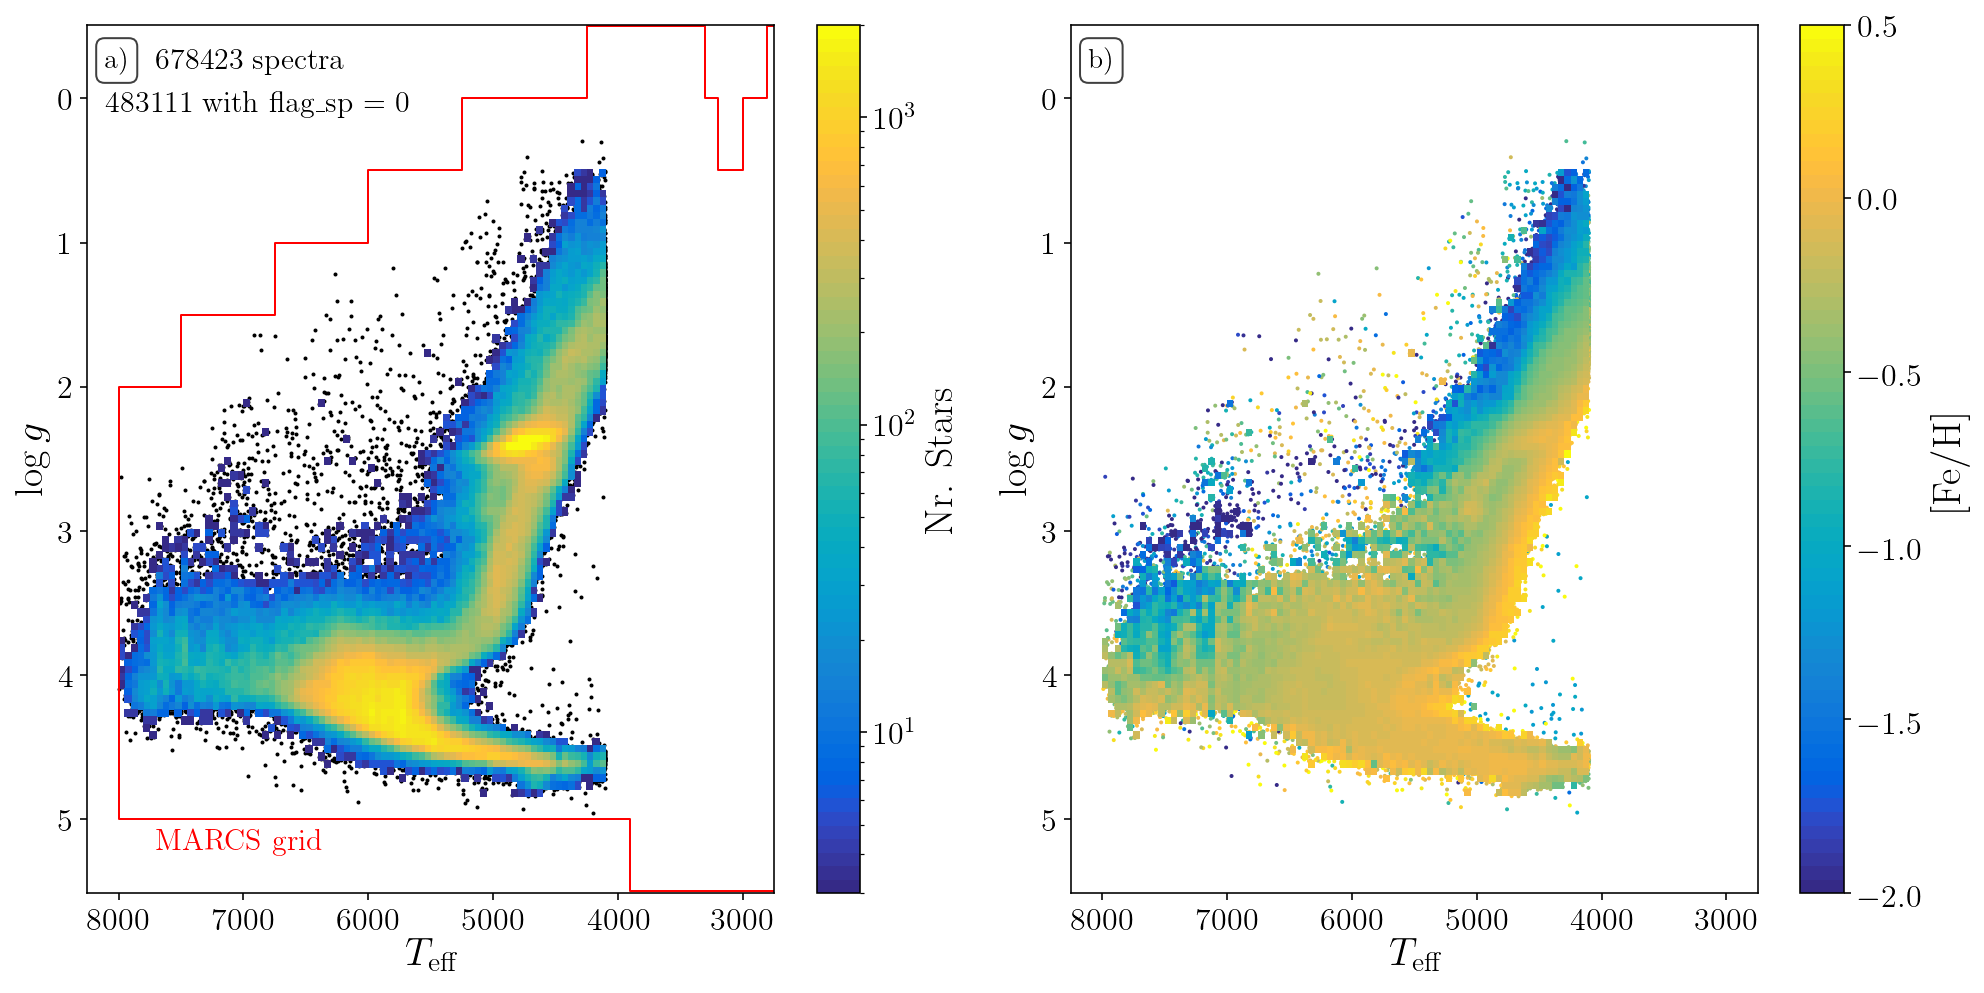

In [24]:
kiel_plot = plot_kiel(main_catalog, flag=0, vmax = 2*10**3, a1='a)', a2='b)')
kiel_plot.savefig('../../../dr3_release_paper/figures/Kiel_Diagram_GALAH_flag_0.png', dpi=200, bbox_inches = 'tight')

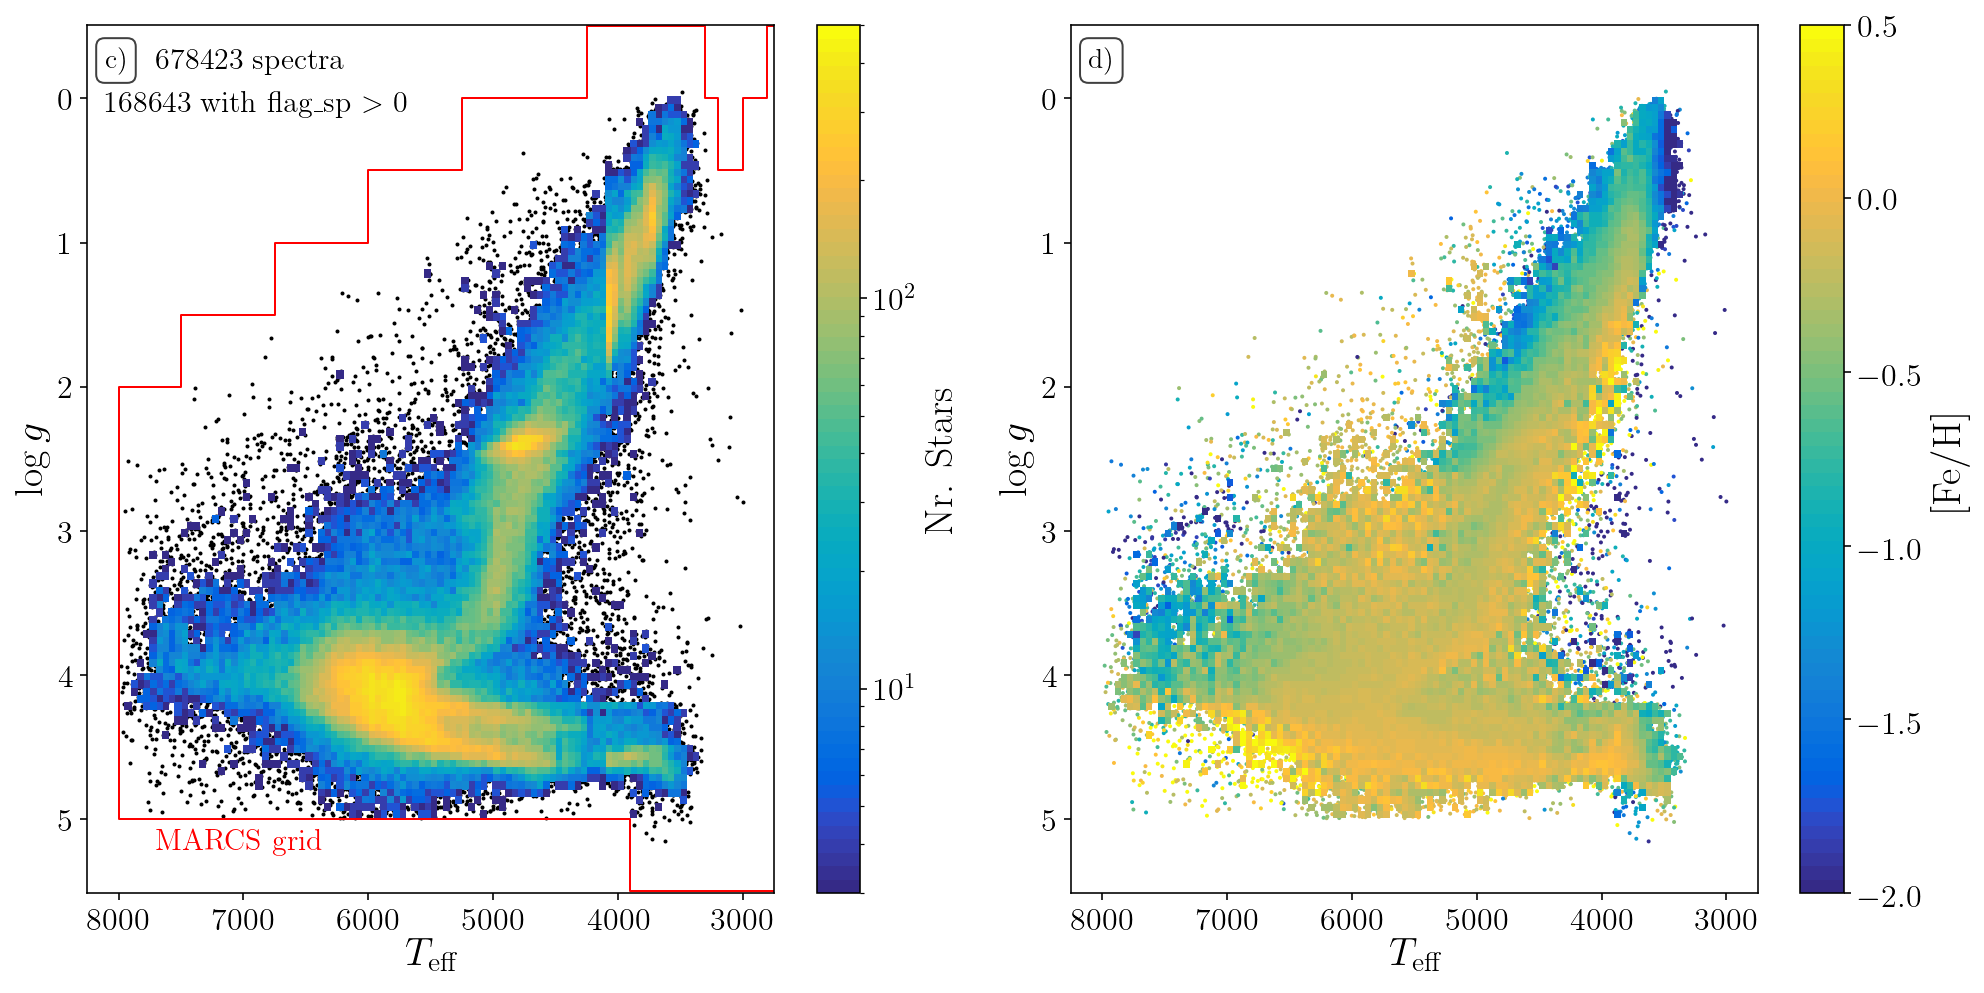

In [25]:
kiel_plot = plot_kiel(main_catalog, flag=10000, vmax = 5*10**2, a1='c)', a2='d)')
kiel_plot.savefig('../../../dr3_release_paper/figures/Kiel_Diagram_GALAH_flag_not0.png', dpi=200, bbox_inches = 'tight')

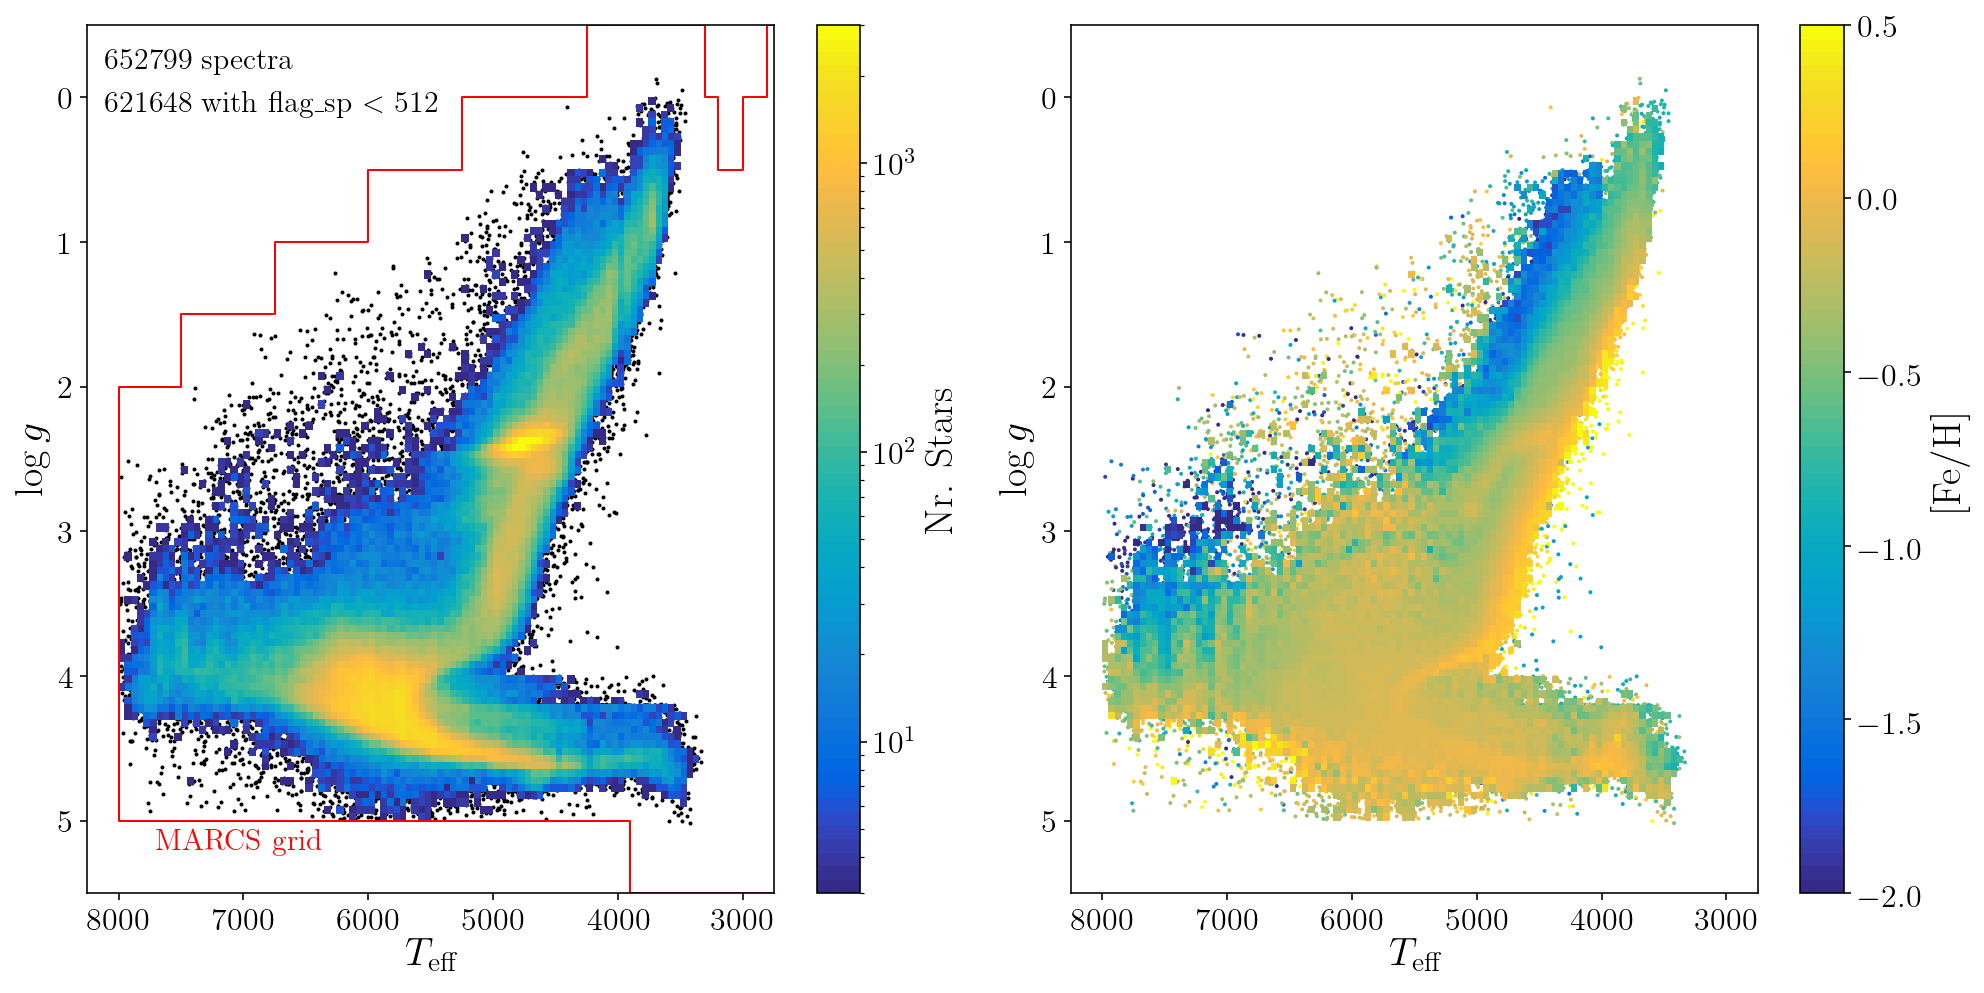

In [37]:
kiel_plot = plot_kiel(main_catalog, flag=512)
kiel_plot.savefig('../../../dr3_release_paper/figures/Kiel_Diagram_GALAH_flag_512.png', dpi=300, bbox_inches = 'tight')

In [4]:
parameter_limits = dict()
parameter_limits['teff'] = (3000,8000)
parameter_limits['logg'] = (-0.5,5.25)
parameter_limits['fe_h'] = (-2.5,0.75)
parameter_limits['vmic'] = (0.7,3.25)
parameter_limits['vbroad'] = (0,100)
parameter_limits['snr_c2_iraf'] = (0,100)
parameter_limits['chi2_sp'] = (0,2)
parameter_limits['flag_sp'] = (0,8)

def check_parameter_limits(each):
    print('param, min, 1st, 5th, 16th, 50, 84th, 95th, 99th, max')
    each_data = main_catalog[each]
    each_data = np.array(each_data[np.isfinite(each_data)])
    plt.figure()
    plt.hist(each_data,bins=100)
    plt.xlabel(each.replace('_','\_'))
    plt.axvline(parameter_limits[each][0],c='r')
    plt.axvline(parameter_limits[each][1],c='r')
    plt.yscale('log')
    print(each,0.01*np.round(100*np.array(np.concatenate(([np.min(each_data)],np.quantile(each_data,q=[0.01,0.05,0.16,0.50,0.84,0.95,0.99]),[np.max(each_data)])))))

# for each in parameter_limits.keys():
#     check_parameter_limits(each)

In [5]:
def add_general_table_information():
    html_text.append(['<TABLE BORDER=2>'])
    html_text.append(['<TR><TD>N(TOTAL)<TD>'+str(len(main_catalog))])
    html_text.append(['<TR><TD>N(FLAG_SP=0)<TD>'+str(len(main_catalog[(main_catalog['flag_sp']==0)]))])
    html_text.append(['</TABLE>'])
    html_text.append(['<br>'])    

In [6]:
def add_snr_chi2_flag_overview(create_new=False):
    
    if create_new:
        f, (ax1) = plt.subplots()
        ax1.hist(main_catalog['snr_c2_iraf'],bins=np.linspace(0,250,100))
        ax1.set_xlabel(r'GALAH DR3 ${snr\_c2}$')
        ax1.text(0.5,0.8,'Median: '+"{:.3f}".format(np.nanmedian(main_catalog['snr_c2_iraf'])),transform=ax1.transAxes)
        ax1.set_ylabel(r'GALAH DR3 Spectra')
        plt.tight_layout()
        plt.savefig('galah_dr3_snr_c2_histogram.png',dpi=300,bbox_inches='tight')

        f, (ax1) = plt.subplots()
        ax1.hist(main_catalog['chi2_sp'],bins=np.linspace(0,5,100))
        ax1.set_xlabel(r'$\chi^2$ Stellar Parameter Run')
        ax1.set_ylabel(r'GALAH DR3 Spectra')
        ax1.text(0.5,0.8,'Median: '+"{:.3f}".format(np.nanmedian(main_catalog['chi2_sp'])),transform=ax1.transAxes)
        plt.tight_layout()
        plt.savefig('galah_dr3_chi2_sp_histogram.png',dpi=300,bbox_inches='tight')

        f, (ax1) = plt.subplots()
        ax1.hist(main_catalog['flag_sp'],bins=100)
        ax1.set_xlabel(r'GALAH DR3 ${flag\_sp}$')
        ax1.set_ylabel(r'GALAH DR3 Spectra')
        plt.tight_layout()
        plt.savefig('galah_dr3_flag_sp_histogram.png',dpi=300,bbox_inches='tight')

    html_text.append(['<TABLE>'])
    html_text.append(['<TR>'])
    html_text.append(['<TD>'])
    html_text.append([r'$S/N$ (ccd2, green chanel) distribution GALAH DR3 Spectra'])
    html_text.append(['<TD>'])
    html_text.append([r'$\chi^2$ distribution GALAH DR3 Spectra'])
    html_text.append(['<TD>'])
    html_text.append([r'\textsc{flag_sp} distribution GALAH DR3 Spectra'])
    html_text.append(['<TR>'])
    html_text.append(['<TD>'])
    html_text.append(['<a href=galah_dr3_snr_c2_histogram.png><IMG src=galah_dr3_snr_c2_histogram.png width=500></a>'])
    html_text.append(['<TD>'])
    html_text.append(['<a href=galah_dr3_chi2_sp_histogram.png><IMG src=galah_dr3_chi2_sp_histogram.png width=500></a>'])
    html_text.append(['<TD>'])
    html_text.append(['<a href=galah_dr3_flag_sp_histogram.png><IMG src=galah_dr3_flag_sp_histogram.png width=500></a>'])
    html_text.append(['</TABLE>'])
    html_text.append(['<br>'])

In [7]:
def add_stellar_parameter_xyc_plots(x_parameters,y_parameters,colors,create_new=False):

    html_text.append(['<TABLE>'])
    
    for each_x in x_parameters:
        
        html_text.append(['<TR>'])
        
        for each_y in y_parameters:

            if each_x == each_y:
                pass
            else:

                html_text.append(['<TR>'])

                for index_color, each_color in enumerate(colors):

                    if index_color%4==0:
                        html_text.append(['<TR>'])

                    html_text.append(['<TD>'])

                    if create_new:

                        print(each_x,each_y,each_color)

                        x_bins = np.linspace(parameter_limits[each_x][0],parameter_limits[each_x][1],200)
                        y_bins = np.linspace(parameter_limits[each_y][0],parameter_limits[each_y][1],200)
                        vmin = parameter_limits[each_color][0]
                        vmax = parameter_limits[each_color][1]

                        plottable = np.isfinite(main_catalog[each_x]) & np.isfinite(main_catalog[each_y]) & np.isfinite(main_catalog[each_color])

                        f, (ax1) = plt.subplots()

#                         s = ax1.scatter(
#                             x = np.clip(main_catalog[each_x][plottable],x_bins[0],x_bins[-1]),
#                             y = np.clip(main_catalog[each_y][plottable],y_bins[0],y_bins[-1]),
#                             c = np.clip(main_catalog[each_color][plottable],vmin,vmax),
#                             vmin = vmin, vmax=vmax, s=0.25, rasterized=True,
#                             cmap = parula,
#                             zorder=1
#                             )

                        s = plot_density(
                            x = np.clip(main_catalog[each_x][plottable],x_bins[0],x_bins[-1]),
                            y = np.clip(main_catalog[each_y][plottable],y_bins[0],y_bins[-1]),
                            bins = (x_bins,y_bins),
                            vmin = vmin,
                            vmax = vmax,
                            weights = np.clip(main_catalog[each_color][plottable],vmin,vmax),
                            reduce_fn='mean',
                            cmin = 5,
                            cmap = parula,
                            ax=ax1,
                            zorder=2,
                            rasterized=True
                            )
                        c = plt.colorbar(s,ax=ax1)

                        ax1.set_xlabel(each_x.replace('_','\_'))
                        ax1.set_ylabel(each_y.replace('_','\_'))
                        c.set_label(each_color.replace('_','\_'))

                        if each_y in ['teff','logg']:
                            ax1.invert_yaxis()
                        if each_x in ['teff','logg']:
                            ax1.invert_xaxis()

                        plt.tight_layout()
                        plt.savefig('galah_dr3_xyc_'+each_x+'_'+each_y+'_'+each_color+'.png',dpi=300,bbox_inches='tight')
                        plt.close()

                    html_text.append(['<a href=galah_dr3_xyc_'+each_x+'_'+each_y+'_'+each_color+'.png><IMG src=galah_dr3_xyc_'+each_x+'_'+each_y+'_'+each_color+'.png width=350></a>'])

    # Append lines to HTML
    html_text.append(['</TABLE>'])

In [8]:
html_text = [
    ['<HTML><BODY>'],
    ['<a href='+main_catalog_file+'> '+str(main_catalog_file)+' </a><br>']
]

In [9]:
add_general_table_information()

In [10]:
add_snr_chi2_flag_overview(create_new=False)

In [11]:
xyc_choices = ['teff','logg','fe_h','vmic','vbroad','snr_c2_iraf','chi2_sp','flag_sp']

add_stellar_parameter_xyc_plots(
    x_parameters = xyc_choices,
    y_parameters = xyc_choices,
    colors = xyc_choices,
    create_new=False
)

In [12]:
html_text.append(['</BODY></HTML>'])
np.savetxt('stellar_parameter_overview.html',np.array(html_text),fmt='%s')